In [42]:
from statsmodels.tsa.api import SimpleExpSmoothing
import pandas as pd
import numpy as np
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
%matplotlib inline

In [43]:
file_dir=os.getcwd()[:-6]+ 'Data/'

In [44]:
#Pull data
df = pd.read_csv(file_dir+'interim/final_data.csv')

In [45]:
df['Date']=pd.to_datetime(df['Date'])

In [46]:
df=df[df['Date']<datetime.datetime(2023,1,1)]

In [47]:
df1=df[['Date','Price']]
df2=df[['Date','Ontario Demand']]

In [48]:
price_train=df1[df1['Date']<datetime.datetime(2022,1,1)]
price_test=df1[df1['Date']>=datetime.datetime(2022,1,1)]
demand_train=df2[df2['Date']<datetime.datetime(2022,1,1)]
demand_test=df2[df2['Date']>=datetime.datetime(2022,1,1)]

In [49]:
price_train=price_train.set_index('Date')
price_test=price_test.set_index('Date')
demand_train=demand_train.set_index('Date')
demand_test=demand_test.set_index('Date')

In [52]:
price_train

,Price
Date,
2020-01-01 01:00:00,0.00
2020-01-01 02:00:00,0.00
2020-01-01 03:00:00,0.00
2020-01-01 04:00:00,0.00
2020-01-01 05:00:00,0.00
...,...
2021-12-31 19:00:00,35.79
2021-12-31 20:00:00,35.66
2021-12-31 21:00:00,36.04


In [51]:
price_test

,Price
Date,
2022-01-01 00:00:00,29.43
2022-01-01 01:00:00,32.18
2022-01-01 02:00:00,59.04
2022-01-01 03:00:00,18.79
2022-01-01 04:00:00,15.78
...,...
2022-12-31 19:00:00,39.19
2022-12-31 20:00:00,40.90
2022-12-31 21:00:00,46.75


In [53]:
demand_train

,Ontario Demand
Date,
2020-01-01 01:00:00,13219
2020-01-01 02:00:00,12895
2020-01-01 03:00:00,12554
2020-01-01 04:00:00,12360
2020-01-01 05:00:00,12353
...,...
2021-12-31 19:00:00,16870
2021-12-31 20:00:00,16046
2021-12-31 21:00:00,15529


In [54]:
demand_test

,Ontario Demand
Date,
2022-01-01 00:00:00,14070
2022-01-01 01:00:00,13543
2022-01-01 02:00:00,13254
2022-01-01 03:00:00,12683
2022-01-01 04:00:00,12491
...,...
2022-12-31 19:00:00,16381
2022-12-31 20:00:00,15834
2022-12-31 21:00:00,15465


In [84]:
#SES for price
for i in np.arange(0.1, 0.9,0.1):
    alpha = i
    ses_price = SimpleExpSmoothing(price_train)
    model_price = ses_price.fit(smoothing_level = alpha, optimized = True)
    forecast = model_price.forecast(8760)
    forecast = pd.DataFrame(forecast).rename(columns={0:'Price'})
    MSE = np.square(forecast-price_test).mean()
    print('alpha:',alpha)
    print('MSE:',MSE['Price'])

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information

alpha: 0.1
MSE: 1507.6971267137492
alpha: 0.2
MSE: 1509.6752239209263
alpha: 0.30000000000000004
MSE: 1526.1376545651588
alpha: 0.4
MSE: 1551.0745502065506
alpha: 0.5
MSE: 1579.0034459117337
alpha: 0.6
MSE: 1607.8938567624018
alpha: 0.7000000000000001
MSE: 1636.8748551882431
alpha: 0.8
MSE: 1665.502616779105


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [96]:
# final ses model for price
alpha = 0.1
ses_price = SimpleExpSmoothing(price_train)
model_price = ses_price.fit(smoothing_level = alpha, optimized = True)
forecast = model_price.forecast(8760)
forecast = pd.DataFrame(forecast).rename(columns={0:'Price'})
forecast

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


,Price
2022-01-01 00:00:00,33.029362
2022-01-01 01:00:00,33.029362
2022-01-01 02:00:00,33.029362
2022-01-01 03:00:00,33.029362
2022-01-01 04:00:00,33.029362
...,...
2022-12-31 19:00:00,33.029362
2022-12-31 20:00:00,33.029362
2022-12-31 21:00:00,33.029362
2022-12-31 22:00:00,33.029362


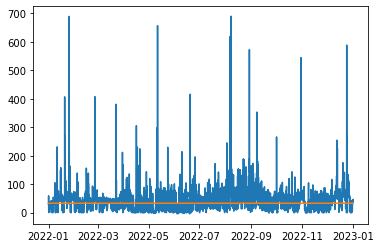

In [97]:
plt.plot(price_test)+plt.plot(forecast)

In [104]:
#SES for demand
for i in np.arange(0.1, 0.9,0.1):
    alpha = i
    ses_demand = SimpleExpSmoothing(demand_train)
    model_demand = ses_demand.fit(smoothing_level = alpha, optimized = True)
    forecast = model_demand.forecast(8760)
    forecast = pd.DataFrame(forecast).rename(columns={0:'Ontario Demand'})
    MSE = np.square(forecast-demand_test).mean()
    print('alpha:',alpha)
    print('MSE:',MSE['Ontario Demand'])

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information

alpha: 0.1
MSE: 5338508.213259455
alpha: 0.2
MSE: 5337691.235888589
alpha: 0.30000000000000004
MSE: 5389248.5677671265
alpha: 0.4
MSE: 5532271.782400877
alpha: 0.5
MSE: 5732210.202006
alpha: 0.6
MSE: 5942205.894279356
alpha: 0.7000000000000001
MSE: 6134414.5261879545
alpha: 0.8
MSE: 6299729.82699047


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [105]:
# final ses model for price
alpha = 0.2
ses_demand = SimpleExpSmoothing(demand_train)
model_demand = ses_demand.fit(smoothing_level = alpha, optimized = True)
forecast = model_demand.forecast(8760)
forecast = pd.DataFrame(forecast).rename(columns={0:'Ontario Demand'})
forecast

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


,Ontario Demand
2022-01-01 00:00:00,15640.692827
2022-01-01 01:00:00,15640.692827
2022-01-01 02:00:00,15640.692827
2022-01-01 03:00:00,15640.692827
2022-01-01 04:00:00,15640.692827
...,...
2022-12-31 19:00:00,15640.692827
2022-12-31 20:00:00,15640.692827
2022-12-31 21:00:00,15640.692827
2022-12-31 22:00:00,15640.692827


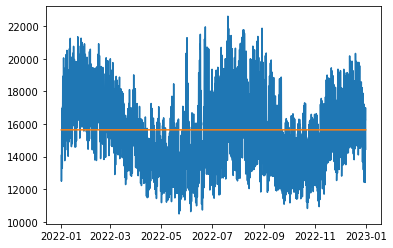

In [107]:
plt.plot(demand_test)+plt.plot(forecast)